In [5]:
include("main_missiles.jl")

main (generic function with 1 method)

In [14]:
include("sim_missiles.jl")

sim_plot (generic function with 1 method)

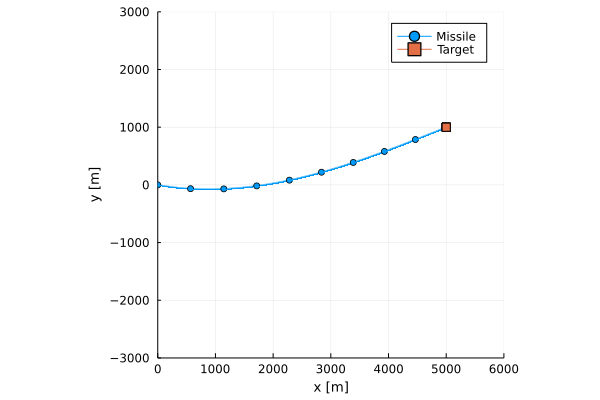

  0.085086 seconds (588.01 k allocations: 42.975 MiB)


In [26]:
sim_plot(N,2, α, deg2rad(100), χ_f_d, σ_M_lim, s_Bias)